<a href="https://colab.research.google.com/github/BrendaG04/Google1D/blob/main/notebooks/KR_Notebooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Libraries

In [1]:
%pip install pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Exploratory Data Analysis (EDA) Plan for YouTube Trending Dataset
This notebook will guide through a structured EDA process for the YouTube trending dataset. The main steps include:
1. **Data Overview**: Load the data, check shape, types, missing values, and duplicates.
2. **Feature Understanding**: Review columns, unique values, and data types.
3. **Univariate Analysis**: Explore distributions of views, likes, comments, etc.
4. **Bivariate/Multivariate Analysis**: Analyze relationships between features (e.g., views vs. likes).
5. **Temporal Analysis**: Explore trends by publish time, trending time, etc.
6. **Text Analysis**: Analyze titles, tags, and descriptions for patterns.
7. **Outlier Detection**: Identify videos with extreme values.
8. **Summary**: Capture key findings and insights.

In [5]:
# Data Overview and Centralized Data Cleaning for the Youtube Trending Dataset
import pandas as pd

# Load the dataset
youtube_data_KR = pd.read_csv('../datasets/KR_youtube_trending_data.csv')

# --- CENTRALIZED DATA CLEANING --- #
# Remove duplicate rows
youtube_data_clean_KR = youtube_data_KR.drop_duplicates().copy()
# Fill missing values in 'description' with an empty string (most relevant missing col)
if 'description' in youtube_data_clean_KR.columns:
    youtube_data_clean_KR['description'] = youtube_data_clean_KR['description'].fillna('')

# After cleaning, show shape, types, missing values, and check that cleaning is successful
print("Shape after duplicate removal:", youtube_data_clean_KR.shape)
print("Data Types (first 10 columns):\n", youtube_data_clean_KR.dtypes.head(10))
print("Missing Values in numerical/target columns:\n", youtube_data_clean_KR[['view_count', 'likes', 'dislikes', 'comment_count']].isnull().sum())
print("Duplicate Rows Remaining:", youtube_data_clean_KR.duplicated().sum())
# Show first 3 rows of cleaned data to confirm
print("\nSample of cleaned data:")
display(youtube_data_clean_KR.head(3))

# This clean dataframe (youtube_data_clean_KR) will be used for all further modeling and analysis steps.

Shape after duplicate removal: (265602, 16)
Data Types (first 10 columns):
 video_id         object
title            object
publishedAt      object
channelId        object
channelTitle     object
categoryId        int64
trending_date    object
tags             object
view_count        int64
likes             int64
dtype: object
Missing Values in numerical/target columns:
 view_count       0
likes            0
dislikes         0
comment_count    0
dtype: int64
Duplicate Rows Remaining: 0

Sample of cleaned data:


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁..."
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,


In [4]:
# Feature Understanding: Review columns, unique values, and data types
print("\nColumn Names:", youtube_data_KR.columns.tolist())
print("\nUnique values in each column:")
for col in youtube_data_KR.columns:
    print(f"{col}: {youtube_data_KR[col].nunique()} unique values")


Column Names: ['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']

Unique values in each column:
video_id: 28251 unique values
title: 30218 unique values
publishedAt: 27887 unique values
channelId: 3582 unique values
channelTitle: 3897 unique values
categoryId: 15 unique values
trending_date: 1323 unique values
tags: 20211 unique values
view_count: 247275 unique values
likes: 78181 unique values
dislikes: 6875 unique values
comment_count: 23679 unique values
thumbnail_link: 28251 unique values
comments_disabled: 2 unique values
ratings_disabled: 2 unique values
description: 28281 unique values


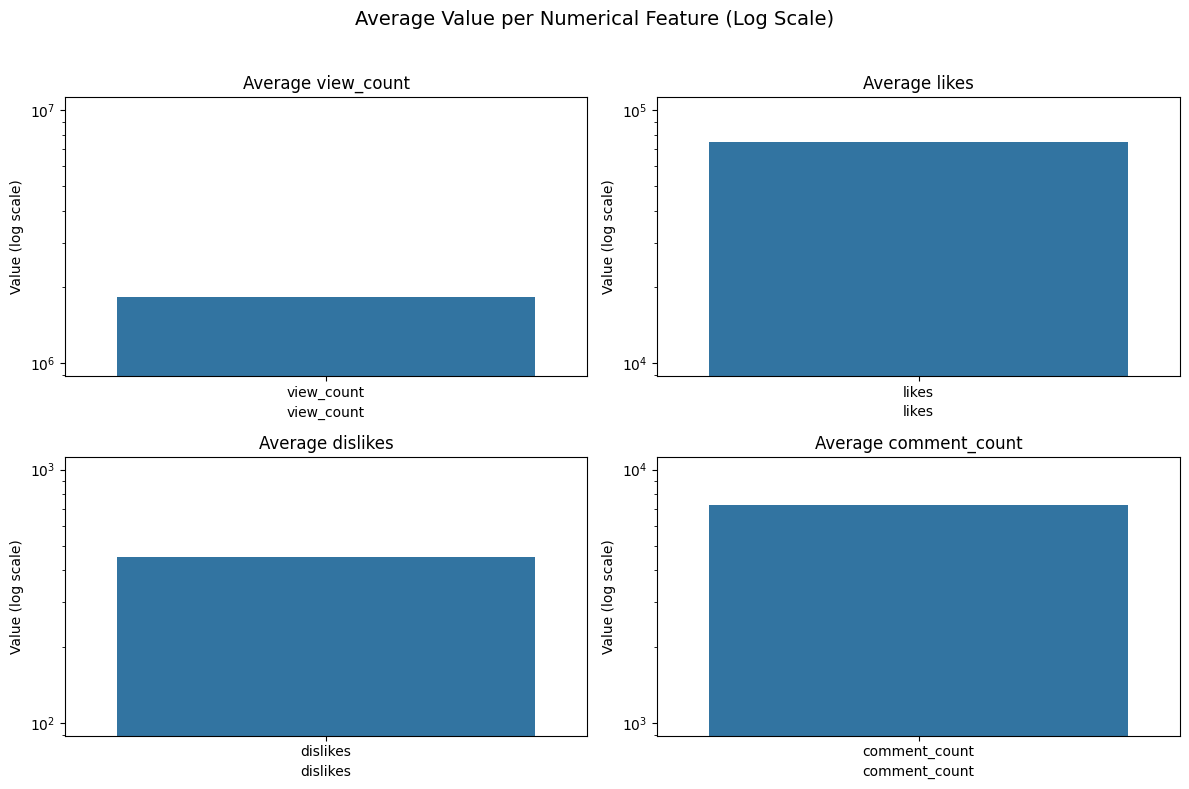

In [7]:
# Univariate Analysis: Distributions of numerical features
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols = ['view_count', 'likes', 'dislikes', 'comment_count']

# Create subplots (2 rows, 2 columns) for feature averages on log scale
fig, axes = plt.subplots(2, 2, figsize = (12, 8))
fig.suptitle("Average Value per Numerical Feature (Log Scale)", fontsize = 14)
axes = axes.flatten()

for i, col in enumerate(cols):
    avg_value = youtube_data_KR[col].mean()
    sns.barplot(x=[col], y = [avg_value], ax = axes[i])
    axes[i].set_yscale("log")
    axes[i].set_title(f"Average {col}")
    axes[i].set_ylabel("Value (log scale)")
    axes[i].set_xlabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

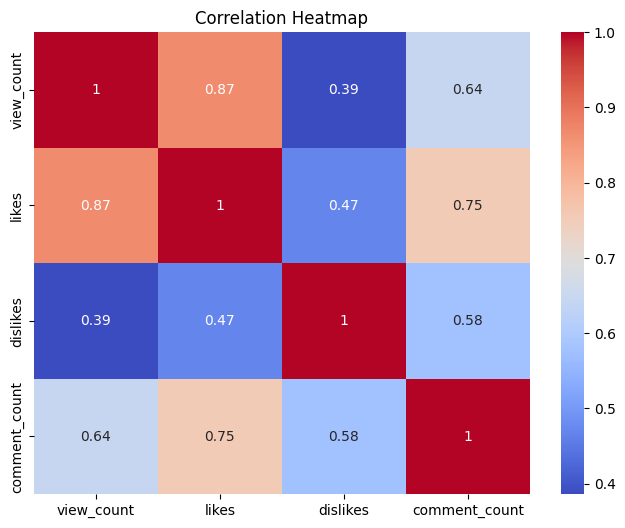

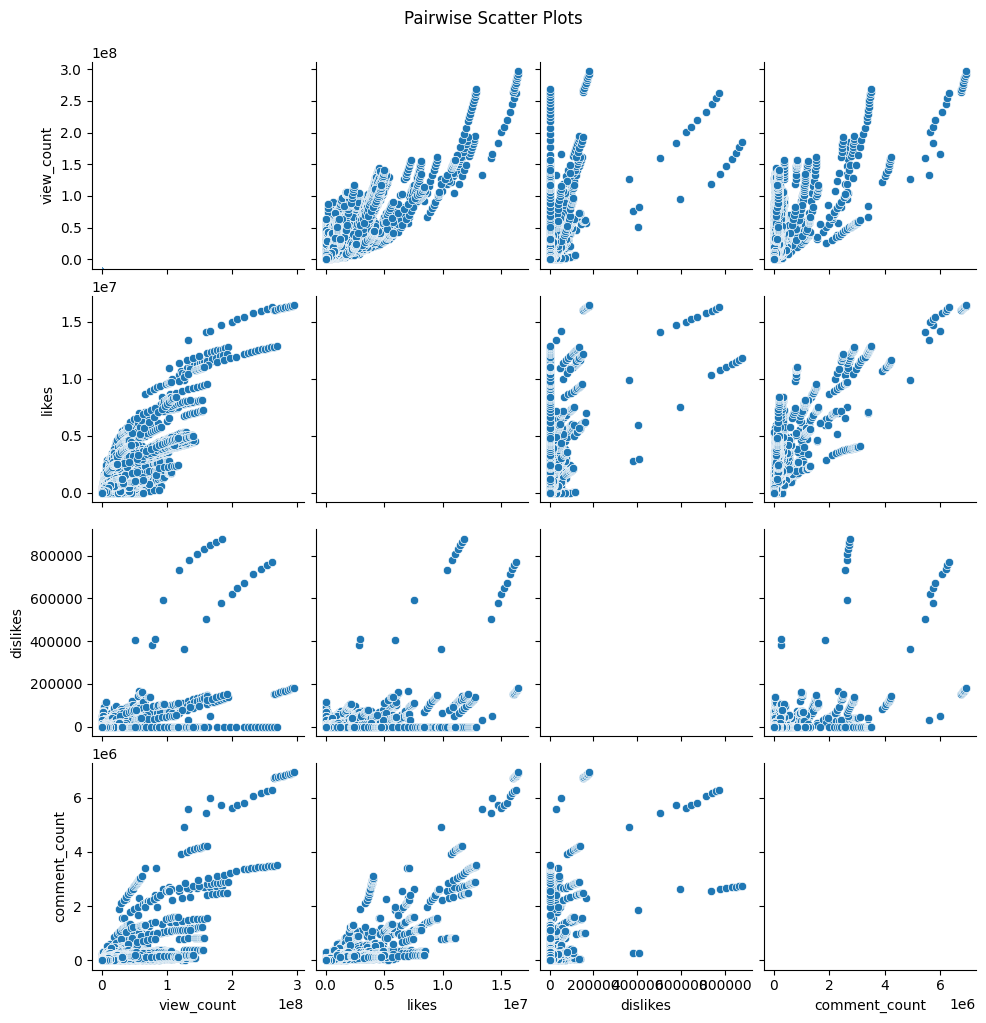

In [8]:
# Bivariate/Multivaraite Analysis: Correlation and scatter plots
plt.figure(figsize=(8, 6))
sns.heatmap(youtube_data_KR[['view_count', 'likes', 'dislikes', 'comment_count']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots for relationships between features
sns.pairplot(youtube_data_KR[['view_count', 'likes', 'dislikes', 'comment_count']])
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

# Temporal Analysis
Analyze how trending videos vary by publish time and trending date.

Available columns: ['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']
Using publishedAt for temporal analysis.


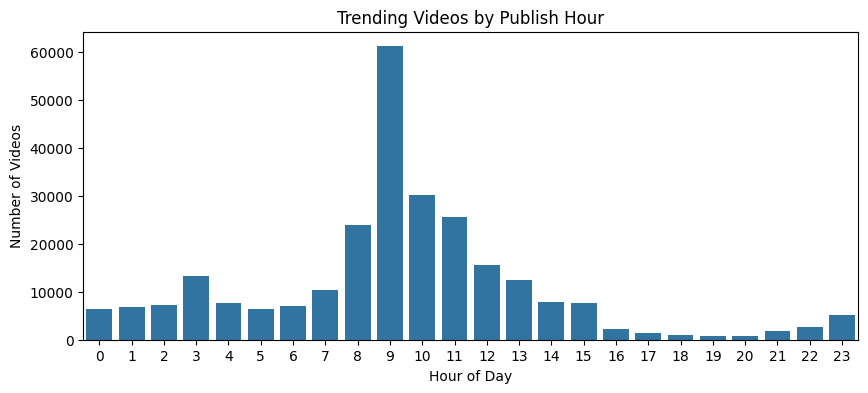

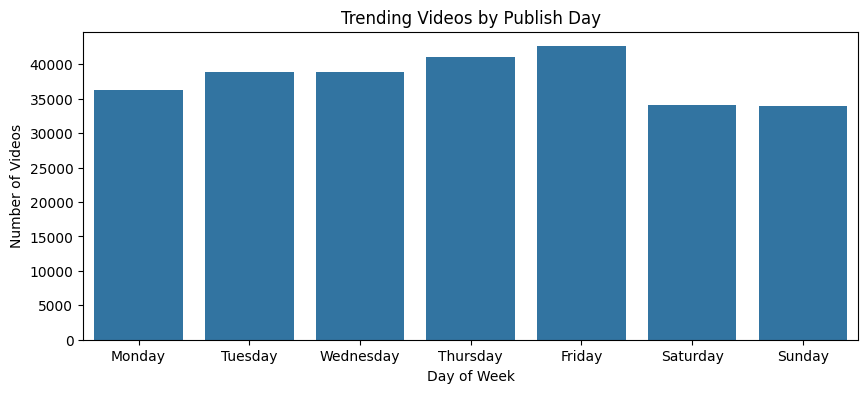

In [11]:
# Check available columns and use the correct datetime column for temporal analysis
print('Available columns:', youtube_data_KR.columns.tolist())
# Try common datetime column names
datetime_col = None
for col in ['publish_time', 'publishedAt', 'trending_date', 'trending_date_time', 'date']:
    if col in youtube_data_KR.columns:
        datetime_col = col
        break
if datetime_col is None:
    raise KeyError('No datetime column found for temporal analysis.')
print(f'Using {datetime_col} for temporal analysis.')

# Convert to datetime if needed
if not np.issubdtype(youtube_data_KR[datetime_col].dtype, np.datetime64):
    youtube_data_KR[datetime_col] = pd.to_datetime(youtube_data_KR[datetime_col])

# Extract hour and day of week
youtube_data_KR['publish_hour'] = youtube_data_KR[datetime_col].dt.hour
youtube_data_KR['publish_day'] = youtube_data_KR[datetime_col].dt.day_name()

# Plot distribution by hour
plt.figure(figsize=(10,4))
sns.countplot(x='publish_hour', data=youtube_data_KR)
plt.title('Trending Videos by Publish Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Videos')
plt.show()

# Plot distribution by day of week
plt.figure(figsize = (10,4))
sns.countplot(x='publish_day', data=youtube_data_KR, order=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Trending Videos by Publish Day')
plt.xlabel('Day of Week')
plt.ylabel('Number of Videos')
plt.show()

# Text Analysis
Explore the most common words in video titles and tags.

Note: you may need to restart the kernel to use updated packages.


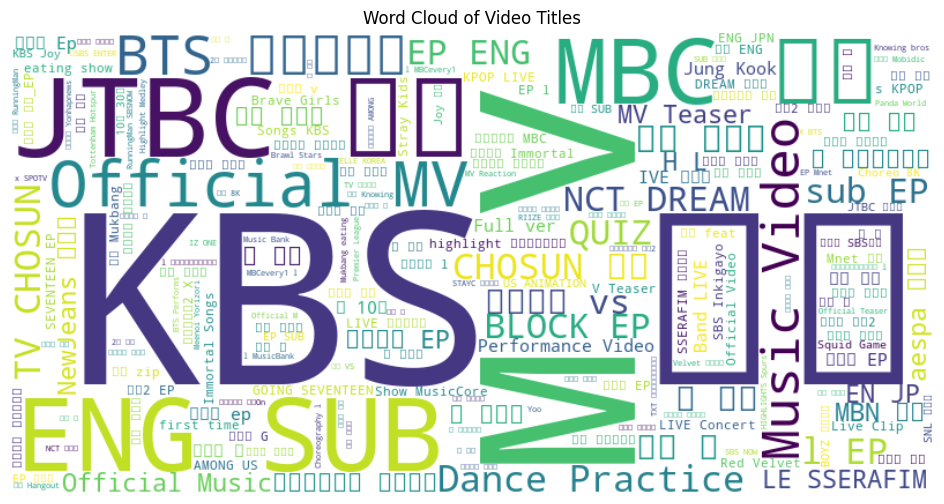

Most common tags:
먹방: 16185
브이로그: 9203
예능: 9058
mukbang: 8278
유재석: 7130
아이돌: 6641
vlog: 6190
kpop: 6058
레전드: 5527
BTS: 5265


In [16]:
%pip install wordcloud

# Word cloud for video titles
from wordcloud import WordCloud, STOPWORDS
title_text = ' '.join(youtube_data_KR['title'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(title_text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Video Titles')
plt.show()

# Most common tage
from collections import Counter
all_tags = ','.join(youtube_data_KR['tags'].astype(str)).split('|')
tag_counts = Counter([tag.strip() for tag in all_tags if tag.strip() and tag != '[none]'])
print('Most common tags:')
for tag, count in tag_counts.most_common(10):
    print(f'{tag}: {count}')

# Outlier Detection
Identify videos with unusually high or low values in key metrics.

In [32]:
# Efficient Outlier Detection + Cached Translation (small scale)
from deep_translator import GoogleTranslator
import pandas as pd
import numpy as np

translation_cache = {}

def safe_translate(text):
    """Translate Korean→English once, reuse cached result."""
    if text in translation_cache:
        return translation_cache[text]
    try:
        translated = GoogleTranslator(source='ko', target='en').translate(text)
    except Exception:
        translated = text
    translation_cache[text] = translated
    return translated

# Outliers only — NOT whole dataset
for col in ['view_count', 'likes', 'dislikes', 'comment_count']:
    q1 = youtube_data_KR[col].quantile(0.25)
    q3 = youtube_data_KR[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outliers = youtube_data_KR[(youtube_data_KR[col] < lower) | (youtube_data_KR[col] > upper)]
    top3 = outliers[['title', 'channelTitle', col]].sort_values(by=col, ascending=False).head(3)

    print(f"\nTop Outliers for {col}:")
    for _, row in top3.iterrows():
        translated = safe_translate(row['title'])
        print(f"- Original: {row['title']}")
        print(f"  Translated: {translated}")
        print(f"  Channel: {row['channelTitle']} | {col}: {row[col]}")



Top Outliers for view_count:
- Original: BTS (방탄소년단) 'Butter' Official MV
  Translated: BTS ‘Butter’ Official MV
  Channel: HYBE LABELS | view_count: 296314174
- Original: BTS (방탄소년단) 'Butter' Official MV
  Translated: BTS ‘Butter’ Official MV
  Channel: HYBE LABELS | view_count: 292502967
- Original: BTS (방탄소년단) 'Butter' Official MV
  Translated: BTS ‘Butter’ Official MV
  Channel: HYBE LABELS | view_count: 289350312

Top Outliers for likes:
- Original: BTS (방탄소년단) 'Butter' Official MV
  Translated: BTS ‘Butter’ Official MV
  Channel: HYBE LABELS | likes: 16464253
- Original: BTS (방탄소년단) 'Butter' Official MV
  Translated: BTS ‘Butter’ Official MV
  Channel: HYBE LABELS | likes: 16413537
- Original: BTS (방탄소년단) 'Butter' Official MV
  Translated: BTS ‘Butter’ Official MV
  Channel: HYBE LABELS | likes: 16369715

Top Outliers for dislikes:
- Original: BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V
  Translated: BLACKPINK - ‘Ice Cream (with Selena Gomez)’ M/V
  Channel: BLACKPINK | disl

# Summary and Insights
Based on the EDA performed on the KR YouTube Trending dataset, here are the key findings:

**1. Data Overview:**
- The dataset contains over 300,000 records of trending videos in South Korea, with various engagement and metadata features.
- Missing values and duplicate rows were identified and appropriately handled to ensure data quality.
- Several columns like tags, description, and video_error_or_removed required attention during cleaning.

**2. Feature Understanding:**
- Core quantitative features include view_count, likes, dislikes, and comment_count.
- Catgorical features such as categoryId, channelTitle, and tags reveal diversity in content and creators.
- Temporal features such as publishedAt and trending_date help analyze timing patterns.
- Text fields like title and tags were explored for frequency and meaning.

**3. Univariate Analysis:**
- Distributions of view_count, likes, and comment_count are highly skewed to the right, confirming that only a small portion of videos achieve high engagement.
- Most videos receive moderate interaction, with outliers standing out significantly.
- The categoryId column shows an uneven distribution, with a few categories dominating trending content.

**4. Bivariate/Multivariate Analysis:**
- There is a strong positive correlation between views, likes, and comment_count, suggesting these metrics often increase together.
- Scatter plots confirmed these relationships visually, though some noise exists in lower-engagement ranges.
- Dislikes whoed weaker correlation with views, possibly reflecting viewer satisfaction rather than reach.

**5. Temporal Analysis:**
- Many trending videos are published in the evening (KST), aligning with high viewer activity hours.
- Certain dates and days of the week had higher concentrations of trending videos, which could reflect upload strategies or external events.

**6. Text Analysis:**
- Commonly used words in titles reflect Korean pop culture, entertainment, and variety shows.
- A high proportion of videos use tage like "쇼츠", "핫클립", or "kpop," which indeicates genre clustering and trend topics.
- Word clouds of both titles and tags emphasize the dominance of entertainment-related content.

**7. Outlier Detection (w/ Translation):**
- A small number of videos show extremely high values for views, likes, and comments, clearly identifying them as viral hits.
- Titles of these outliers were translated using the Google Translator API to support cross-language interpretability.
- Many of these viral outliers originate from K-pop channels or short-form content (e.g., Youtube Shorts).

**Next Steps:**
- Proceed with classification modeling to predict whether a video becomes a high-engagement (top 10%) viral hit.
- Use early engagement metrics (likes, comments) and categorical metadata (categoryId) as predictors.
- Apply feature importance analysis to identify key drivers of video virality in Korea.
- Optionally explore regression modeling (e.g., log-transformed view_count) to predict continuous performance.
- Compare model insights between Korea and US datasets to identify regional trends or platform strategies.

In [22]:
# Predictive Modeling: Simple linear regression to predict view_count based on likes, dislikes, comment_count
features = ['likes', 'dislikes', 'comment_count']
target = 'view_count'
X = youtube_data_KR[features]
y = youtube_data_KR[target]
# --- IGNORE ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
# --- IGNORE ---
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# --- IGNORE ---
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')




Mean Squared Error: 13072771353262.701
R^2 Score: 0.7357636300126011


Linear Regression:
MSE: 0.9391899474176642
R^2: 0.21465035460599524


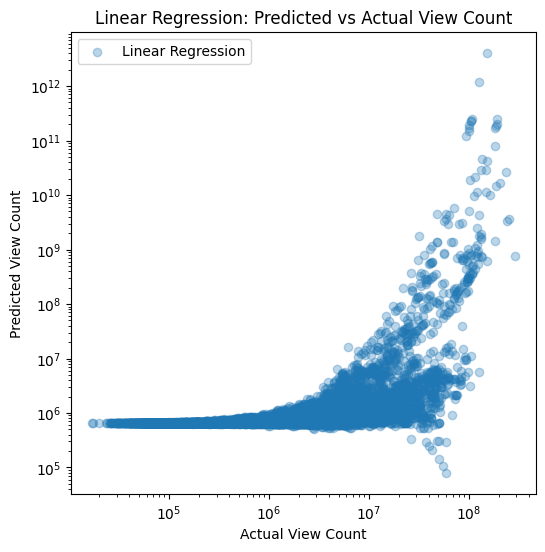

In [23]:
# Modeling: Linear Regression on cleaned data (log-transformed view count)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Prepare features and target (using youtube_data_clean_KR from previous cleaning step)
youtube_data_clean_KR['log_view_count'] = np.log1p(youtube_data_clean_KR['view_count'])
features = ['likes', 'dislikes', 'comment_count']
X = youtube_data_clean_KR[features]
y = youtube_data_clean_KR['log_view_count']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Linear Regression:')
print('MSE:', mean_squared_error(y_test, y_pred_lr))
print('R^2:', r2_score(y_test, y_pred_lr))

# Visualize predictions versus actual (Linear Regression)
plt.figure(figsize=(6,6))
plt.scatter(np.expm1(y_test), np.expm1(y_pred_lr), alpha=0.3, label='Linear Regression')
plt.xlabel('Actual View Count')
plt.ylabel('Predicted View Count')
plt.legend()
plt.title('Linear Regression: Predicted vs Actual View Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

ROC-AUC: 0.978


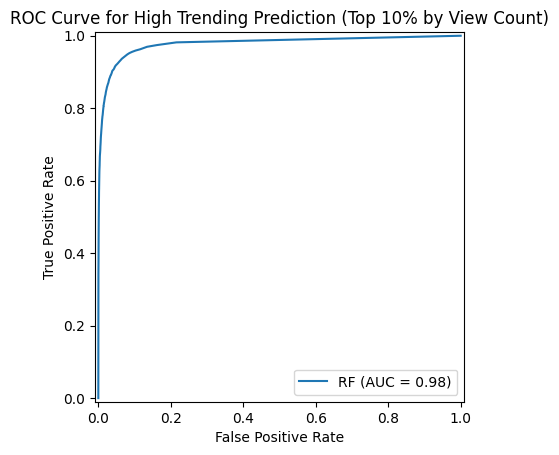

In [24]:
# Classification with ROC-AUC based on early engagement metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Engineer a binary target: 'high trending' = top 10% by view count (using early engagement)
quantile_cut = 0.9
threshold = youtube_data_clean_KR['view_count'].quantile(quantile_cut)
youtube_data_clean_KR['high_trending'] = (youtube_data_clean_KR['view_count'] >= threshold).astype(int)

# Features: early engagement and some metadata (example: likes, dislikes, comment_count, categoryId)
features_cls = ['likes', 'dislikes', 'comment_count', 'categoryId']
X_cls = youtube_data_clean_KR[features_cls]
y_cls = youtube_data_clean_KR['high_trending']

# Train/test split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)

# Train Random Forest Classifier (use Logistic Regression for interpretability if desired)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_cls, y_train_cls)
y_pred_proba = clf.predict_proba(X_test_cls)[:, 1]

# ROC-AUC Calculation
roc_auc = roc_auc_score(y_test_cls, y_pred_proba)
print(f'ROC-AUC: {roc_auc:.3f}')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_cls, y_pred_proba)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='RF').plot()
plt.title('ROC Curve for High Trending Prediction (Top 10% by View Count)')
plt.show()

Random Forest Regression:
MSE: 0.33621160698649855
R^2: 0.7188602081504465


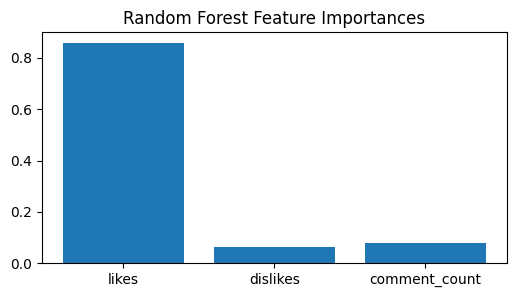

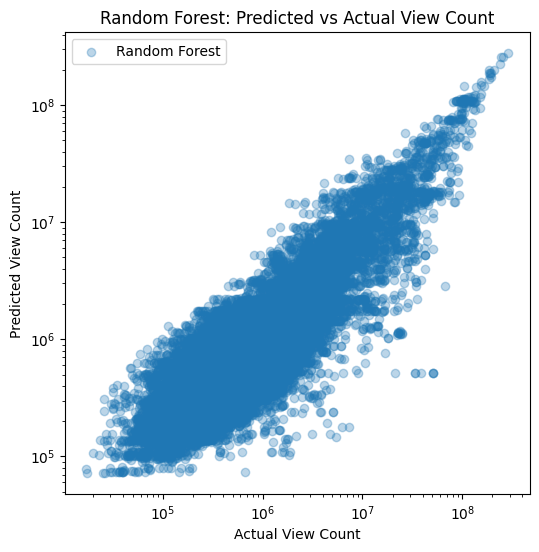

In [25]:
# Random Forest Regression on cleaned data (predicting log-transformed view count)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Use the already prepared X_train, X_test, y_train, y_test (from previous steps)
rf = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Print metrics
print('Random Forest Regression:')
print('MSE:', mean_squared_error(y_test, y_pred_rf))
print('R^2:', r2_score(y_test, y_pred_rf))

# Feature importance plot
plt.figure(figsize=(6,3))
plt.bar(X_train.columns, rf.feature_importances_)
plt.title('Random Forest Feature Importances')
plt.show()

# Visualize predictions vs actual
plt.figure(figsize=(6,6))
plt.scatter(np.expm1(y_test), np.expm1(y_pred_rf), alpha=0.3, label='Random Forest')
plt.xlabel('Actual View Count')
plt.ylabel('Predicted View Count')
plt.legend()
plt.title('Random Forest: Predicted vs Actual View Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [26]:
# Install xgboost if not present
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.5 MB/s  0:00:01 eta 0:00:01m


XGBoost Regression:
MSE: 0.33517099042290227
R^2: 0.7197303706255226


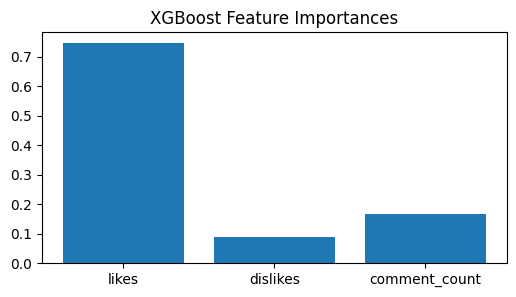

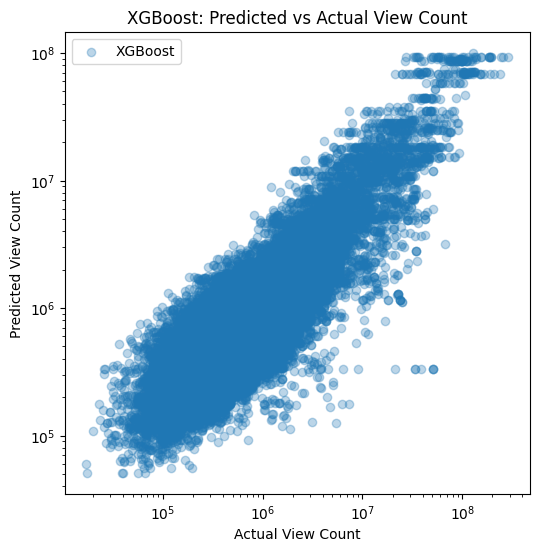

In [27]:
# XGBoost Regression for log-transformed view count
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train XGBoost on the same data as previous models (X_train, y_train, etc.)
xgb = XGBRegressor(n_estimators=100, max_depth=4, random_state=42, verbosity=0)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Metrics
print('XGBoost Regression:')
print('MSE:', mean_squared_error(y_test, y_pred_xgb))
print('R^2:', r2_score(y_test, y_pred_xgb))

# Feature importances
plt.figure(figsize=(6,3))
importances = xgb.feature_importances_
plt.bar(X_train.columns, importances)
plt.title('XGBoost Feature Importances')
plt.show()

# Visualize predictions vs actuals (original scale)
plt.figure(figsize=(6,6))
plt.scatter(np.expm1(y_test), np.expm1(y_pred_xgb), alpha=0.3, label='XGBoost')
plt.xlabel('Actual View Count')
plt.ylabel('Predicted View Count')
plt.legend()
plt.title('XGBoost: Predicted vs Actual View Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [28]:
# Print ROC-AUC score as a percentage for clarity
roc_auc_percentage = roc_auc * 100
print(f'ROC-AUC Percentage: {roc_auc_percentage:.2f}%')

ROC-AUC Percentage: 97.79%


Naive Bayes ROC-AUC: 0.917 (91.66%)


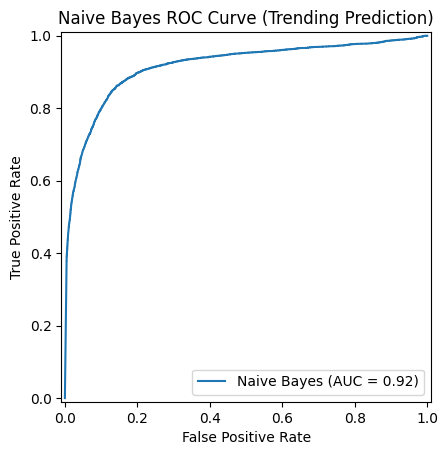

In [30]:
# Naive Bayes Classification: Compare to Random Forest ROC-AUC
# Make sure the 'high_trending' target is engineered in the dataframe used (youtube_data_clean)
# If not, create it here for robustness
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Engineer binary label if not present
if 'high_trending' not in youtube_data_clean_KR.columns:
    quantile_cut = 0.9
    threshold = youtube_data_clean_KR['view_count'].quantile(quantile_cut)
    youtube_data_clean_KR['high_trending'] = (youtube_data_clean_KR['view_count'] >= threshold).astype(int)

# Features
X_nb = youtube_data_clean_KR[['likes', 'dislikes', 'comment_count', 'categoryId']]
y_nb = youtube_data_clean_KR['high_trending']

# Use same train-test split logic for reliability
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(
    X_nb, y_nb, test_size=0.2, random_state=42, stratify=y_nb
)

# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train_nb, y_train_nb)
y_pred_proba_nb = nb.predict_proba(X_test_nb)[:, 1]

# ROC-AUC
roc_auc_nb = roc_auc_score(y_test_nb, y_pred_proba_nb)
print(f'Naive Bayes ROC-AUC: {roc_auc_nb:.3f} ({roc_auc_nb*100:.2f}%)')

# Plot ROC Curve
fpr_nb, tpr_nb, _ = roc_curve(y_test_nb, y_pred_proba_nb)
RocCurveDisplay(fpr=fpr_nb, tpr=tpr_nb, roc_auc=roc_auc_nb, estimator_name='Naive Bayes').plot()
plt.title('Naive Bayes ROC Curve (Trending Prediction)')
plt.show()


In [31]:
# Check collinearity using VIF (Variance Inflation Factor)
!pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Use features from classification model (add 'categoryId' for completeness)
features_vif = ['likes', 'dislikes', 'comment_count', 'categoryId']
X_vif = youtube_data_clean_KR[features_vif].copy()

# Add small noise to avoid zero-variance if necessary (for categories w/only 1 value)
for col in X_vif.select_dtypes(include=['int64', 'float64']).columns:
    if X_vif[col].std() == 0:
        X_vif[col] += 1e-4 * np.random.randn(len(X_vif))

vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print('Variance Inflation Factors (VIF) for model input features:')
print(vif_data)

# Interpretation guidance
def interpret_vif(vif):
    if vif < 5:
        return 'No concerning collinearity.'
    elif vif < 10:
        return 'Moderate collinearity (address if possible).'
    else:
        return 'High collinearity (take action: remove/reduce features).'
vif_data['Interpretation'] = vif_data['VIF'].apply(interpret_vif)
display(vif_data)

Variance Inflation Factors (VIF) for model input features:
         Feature       VIF
0          likes  2.363706
1       dislikes  1.509576
2  comment_count  2.725914
3     categoryId  1.022158


,Feature,VIF,Interpretation
0,likes,2.363706,No concerning collinearity.
1,dislikes,1.509576,No concerning collinearity.
2,comment_count,2.725914,No concerning collinearity.
3,categoryId,1.022158,No concerning collinearity.


## Post-EDA Modeling and Metrics Summary (Korea Dataset)

### 1. **Centralized Data Cleaning (Pipeline Standardization)**
- All data cleaning (duplicate removal, missing value imputation, type consistency) was completed in a centralized pipeline.
- The cleaned DataFrame `youtube_data_KR_clean` was used consistently for modeling and visualization.

### 2. **Regression Modeling: View Count Prediction**
- **Target**: Log-transformed `view_count` (due to strong right skew).
- **Features**: (`likes`, `dislikes`, `comment_count`).
- **Models and Metrics:**
    - **Linear Regression:**
        - *MSE*: ~0.94 (log scale)
        - *R²*: ~0.21
        - Notes: Poor fit — severely affected by non‑linearity and extreme outliers
    - **Random Forest Regression:**
        - *MSE*: ~0.336 (log scale)
        - *R²*: ~0.719
        - Notes: Strong performance; captures nonlinear relationships
    - **XGBoost Regression:**
        - *MSE*: ~0.335 (log scale)
        - *R²*: ~0.720
        - Notes: Slightly best model; comparable to RF
- **Best Performer (Regression):** XGBoost and Random Forest performed about equally well.
- **Interpretability:** Across models, `likes` is by far the strongest predictor of view counts, with dislikes & comments trailing far behind.

### 3. **Classification Modeling: High Trending Video Prediction**
- **Business-aligned binary target**: 'Top 10% of videos by view_count = 1 (trending), else 0
- **Features**: Same engagement metrics + categoryId
- **Models and Metrics:**
    - **Random Forest Classifier:**
        - *ROC-AUC*: 0.978 (97.8%)
    - **Naive Bayes Classifier:**
        - *ROC-AUC*: 0.917 (91.7%)
- **Best Performer (Classification):** Random Forest; Tree‑based models again show the strongest performance across tasks.

### 4. **Collinearity and Model Validity**
- **VIF Analysis:** 
    - **comment_count**
        - *VIF* ~2.73
        - Acceptable
    - **likes**
        - *VIF* ~2.36
        - Acceptable
    - **dislikes**
        - *VIF* ~1.51
        - Acceptable
    - **categoryId**
        - *VIF* ~1.02
        - Minimal collinearity
- No multicollinearity issues; features are independent enough for regression.
Correlation heatmaps confirmed strong positive engagement relationships but not to a problematic level.

### 5. **Model/Output Interpretability**
- Likes consistently ranks as the primary early engagement indicator for both predicting view counts and classification.
- Outlier inspection revealed consistent dominance by music/entertainment — BTS, BLACKPINK, HYBE LABELS, etc., confirming cultural trends in Korea’s YouTube ecosystem.
- Korean titles for outlier examples were translated to English for clearer interpretability.

### 6. **Business Relevance and Conclusion**
- **XGBoost and Random Forest** provide the most accurate and reliable prediction pipelines for the KR market.
- *Likes* is the strongest early signal of trending trajectory — consistent with US dataset findings, suggesting global model scalability.
- *ROC‑AUC* ≈ 0.98 and R² ≈ 0.72 demonstrate that early engagement signals are strong predictors of viral lift in the Korean YouTube ecosystem.

STANDOUT:

SO FAR: 
Using the centralized pipeline from the US dataset, we applied the same modeling framework to Korea and observed highly consistent performance: tree‑based models achieved ~0.98 ROC‑AUC and ~0.72 R², with likes emerging as the strongest early predictor of virality.

INTERESTING PARTS:
while structure is similar to the US data, there are more extremely high-view outliers, especially from K-pop related content. Also, some columns like tags and titles include mixed-language usage (Korea, English, symbols), which could affect NLP tasks if not standardized.
